In [ ]:
%pip install wordcloud

In [2]:
# importing all necessary libraries/environments here
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

#### Basic Data Exploration

In [3]:
# Loading the dataset
file_path = r"D:\Data Mining\Data Mining Exam\Part C\European news.csv"
df = pd.read_csv(file_path)

# Basic information
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Articles  2225 non-null   object
 1   labels    2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


(None,
                                             Articles         labels
 0  Musicians to tackle US red tape  Musicians gro...  entertainment
 1  U2s desire to be number one  U2, who have won ...  entertainment
 2  Rocker Doherty in on-stage fight  Rock singer ...  entertainment
 3  Snicket tops US box office chart  The film ada...  entertainment
 4  Oceans Twelve raids box office  Oceans Twelve,...  entertainment)

##### Data Preprocessing
- Variable types in the dataset are:-
- "Articles" which is the News Content is  unstructured textual data (String / Object Type)
- "labels" which is the News Category is Categorical Data (String / Object Type)

In [4]:
# Check for missing values
missing_rows = df.isnull().any(axis=1).sum()
print(f"Number of rows with missing values: {missing_rows}")

# Drop rows with missing values if any exist
if missing_rows > 0:
    df = df.dropna()
    print("Rows with missing values have been removed.")
else:
    print("No missing values found.")

Number of rows with missing values: 0
No missing values found.


In [5]:
# Check & removal of duplicates (Same article and label)
duplicates = df[df.duplicated(subset=["Articles", "labels"], keep=False)]

# Number and all duplicated rows
print(f"Total duplicated rows (same article & label): {duplicates.shape[0]}")
print(duplicates)

# Removing duplicates while keeping the first occurrence
df_cleaned = df.drop_duplicates(subset=["Articles", "labels"], keep="first")

# Resetting index so that deleted indexes are re-used
df_cleaned = df_cleaned.reset_index(drop=True)

# Confirming duplicates are removed
print(f"\nRemaining duplicate rows after removal: {df_cleaned.duplicated(subset=['Articles', 'labels']).sum()}")

print(df_cleaned.head(26))

Total duplicated rows (same article & label): 198
                                               Articles         labels
4     Oceans Twelve raids box office  Oceans Twelve,...  entertainment
13    Brits return Keane to number one  Brits succes...  entertainment
16    De Niro film leads US box office  Film star Ro...  entertainment
23    Brits return Keane to number one  Brits succes...  entertainment
25    Oceans Twelve raids box office  Oceans Twelve,...  entertainment
...                                                 ...            ...
2209  Apple iPod family expands market  Apple has ex...           tech
2211  Millions buy MP3 players in US  One in 10 adul...           tech
2214  Seamen sail into biometric future  The luxury ...           tech
2216  Blind student hears in colour  A blind student...           tech
2218  Software watching while you work  Software tha...           tech

[198 rows x 2 columns]

Remaining duplicate rows after removal: 0
                               

#### Visualisation
- Visualisation of News Category Distribution 
- Top N Words per Category

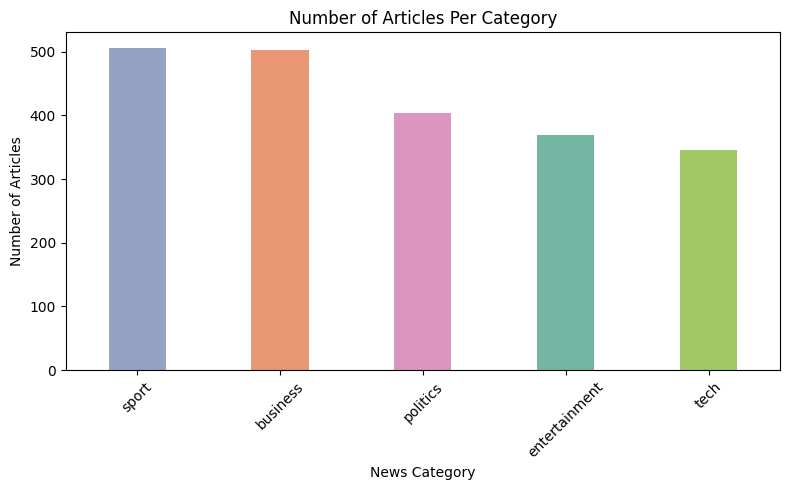

In [21]:
# Bar Chart Visualisation
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='labels', hue='labels', order=df_cleaned['labels'].value_counts().index, 
              palette='Set2', legend=False, width=0.4)
plt.title('Number of Articles Per Category')
plt.xticks(rotation=45)
plt.xlabel('News Category')
plt.ylabel('Number of Articles')
plt.tight_layout()
plt.show()

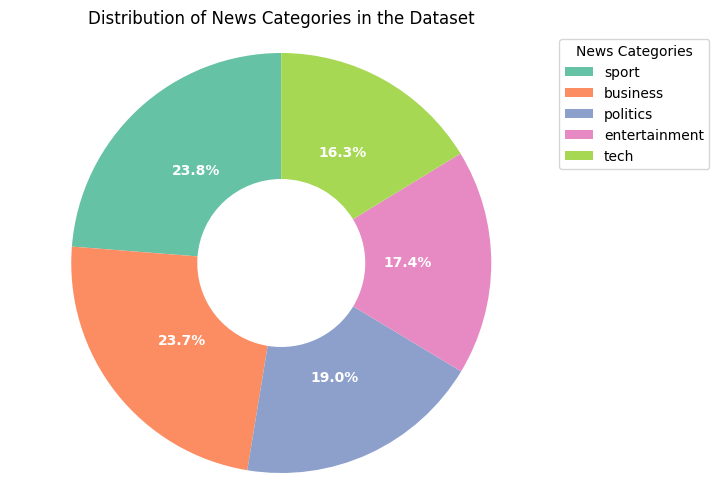

In [22]:
# Donut Chart Visualization
category_counts = df_cleaned['labels'].value_counts()

plt.figure(figsize=(7, 6))
wedges, texts, autotexts = plt.pie(category_counts, 
                                   labels=None,
                                   autopct='%1.1f%%', 
                                   startangle=90, 
                                   colors=sns.color_palette('Set2', len(category_counts)),
                                   wedgeprops={'width': 0.6})

plt.setp(autotexts, size=10, weight="bold", color="white")

plt.title('Distribution of News Categories in the Dataset')

# Legend
plt.legend(category_counts.index, title='News Categories', loc='upper left', bbox_to_anchor=(1, 1))

plt.axis('equal')
plt.show()


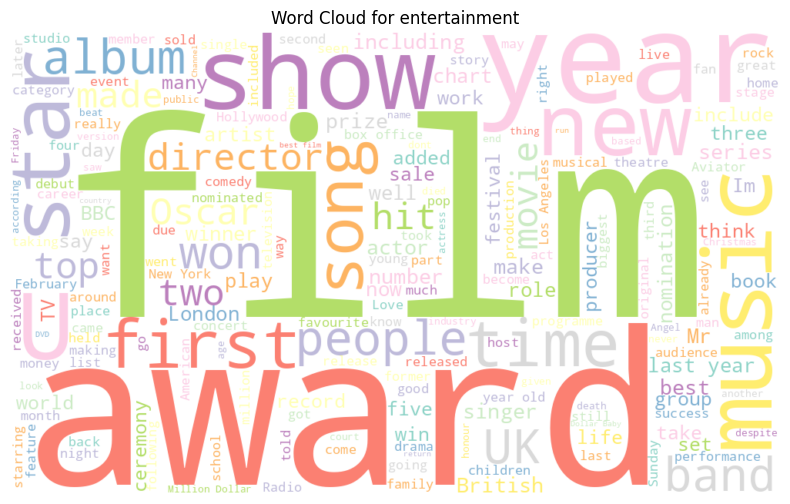

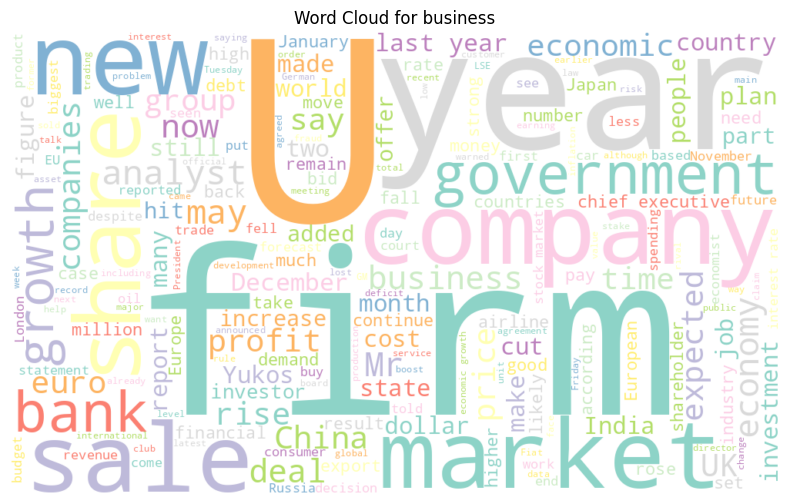

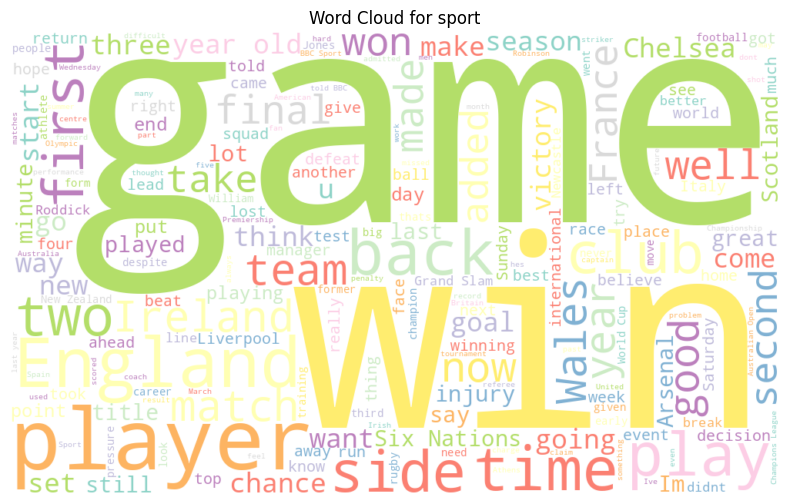

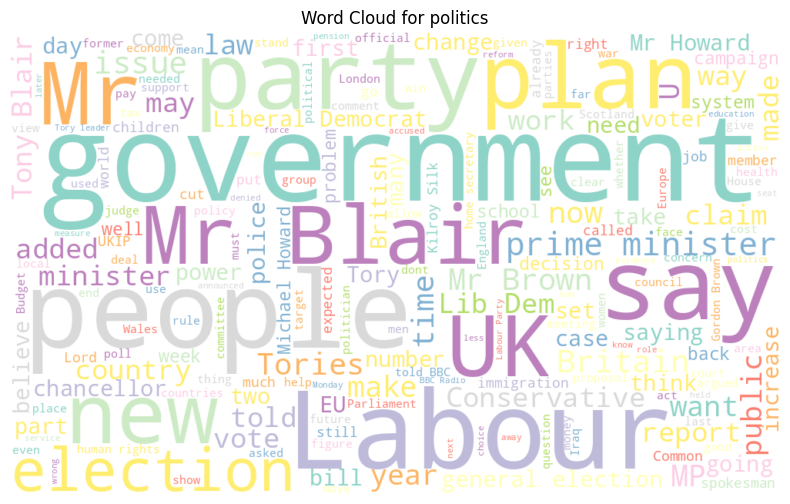

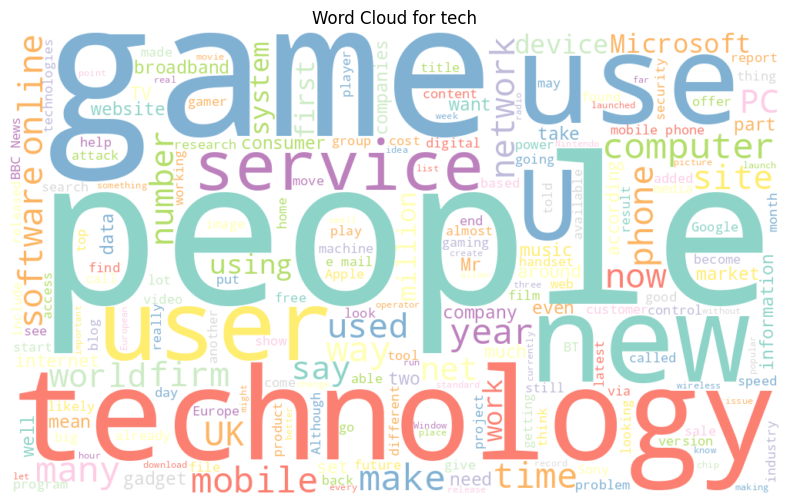

In [23]:
# Top N Words per Category
from wordcloud import STOPWORDS

# custom stopwords
custom_stopwords = STOPWORDS.union({'will', 'said', 'one'})

# Top words per category
labels = df_cleaned['labels'].unique()

for label in labels:
    category_text = ' '.join(df_cleaned[df_cleaned['labels'] == label]['Articles'].dropna().astype(str))
    
    # word cloud excluding stopwords
    wordcloud = WordCloud(width=1000, 
                          height=600, 
                          background_color='white', 
                          colormap='Set3', 
                          stopwords=custom_stopwords).generate(category_text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {label}")
    plt.show()


#### Natural Language Processing algorithm to classify the news articles
- Split data into training and test sets, train model and evaluate model performance
- Save the trained model

In [9]:
df_new = df_cleaned.copy() # using copy of the cleaned dataset
df_new.info(), df_new

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Articles  2126 non-null   object
 1   labels    2126 non-null   object
dtypes: object(2)
memory usage: 33.3+ KB


(None,
                                                Articles         labels
 0     Musicians to tackle US red tape  Musicians gro...  entertainment
 1     U2s desire to be number one  U2, who have won ...  entertainment
 2     Rocker Doherty in on-stage fight  Rock singer ...  entertainment
 3     Snicket tops US box office chart  The film ada...  entertainment
 4     Oceans Twelve raids box office  Oceans Twelve,...  entertainment
 ...                                                 ...            ...
 2121  Warning over Windows Word files  Writing a Mic...           tech
 2122  Fast lifts rise into record books  Two high-sp...           tech
 2123  Nintendo adds media playing to DS  Nintendo is...           tech
 2124  Fast moving phone viruses appear  Security fir...           tech
 2125  Hacker threat to Apples iTunes  Users of Apple...           tech
 
 [2126 rows x 2 columns])

In [10]:
# Encoding 'labels'(categorical) into numerical format
encoder = LabelEncoder()

# Encoding "labels" column
df_new['labels'] = encoder.fit_transform(df_new['labels'])
df_new

,Articles,labels
0,Musicians to tackle US red tape Musicians gro...,1
1,"U2s desire to be number one U2, who have won ...",1
2,Rocker Doherty in on-stage fight Rock singer ...,1
3,Snicket tops US box office chart The film ada...,1
4,"Oceans Twelve raids box office Oceans Twelve,...",1
...,...,...
2121,Warning over Windows Word files Writing a Mic...,4
2122,Fast lifts rise into record books Two high-sp...,4
2123,Nintendo adds media playing to DS Nintendo is...,4
2124,Fast moving phone viruses appear Security fir...,4


In [11]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 1: Split the data into training and test sets
X = df_new['Articles'] #feature
y = df_new['labels'] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Text vectorization on training data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Transform the training and testing data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Training a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Making y predictions
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluating model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9671361502347418

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       101
           1       1.00      0.91      0.95        74
           2       0.95      0.96      0.96        81
           3       0.97      1.00      0.99       101
           4       0.98      0.94      0.96        69

    accuracy                           0.97       426
   macro avg       0.97      0.96      0.97       426
weighted avg       0.97      0.97      0.97       426


Confusion Matrix:
 [[101   0   0   0   0]
 [  2  67   3   1   1]
 [  3   0  78   0   0]
 [  0   0   0 101   0]
 [  1   0   1   2  65]]


In [12]:
# 5-fold cross validation of model's performance
import numpy as np

cv_scores = cross_val_score(nb_classifier, X_train_tfidf, y_train, cv=5, scoring='accuracy')

# Print the cross-validation results
print(f"Cross-validation accuracy scores (5-fold): {cv_scores}")
print(f"Mean cross-validation accuracy: {np.mean(cv_scores)}")
print(f"Standard deviation of cross-validation accuracy: {np.std(cv_scores)}")

Cross-validation accuracy scores (5-fold): [0.93823529 0.95882353 0.97352941 0.94705882 0.95294118]
Mean cross-validation accuracy: 0.9541176470588235
Standard deviation of cross-validation accuracy: 0.011852612752711699


##### The model demonstrates strong performance in classifying news articles, with overall accuracy of 0.967 (96.71%) on the test set. The 5-fold cross-validation results show a mean accuracy of 0.954 (95.41%) with a low standard deviation of 0.0119, indicating stable and consistent performance across different data subsets. The classification report reveals that the model performs well across all categories, with high precision, recall, and F1-scores for most labels, such as business (precision = 0.94, recall = 1.00) and sport (precision = 0.97, recall = 1.00). recall slightly drops for some categories like entertainment (0.91), the model still achieves a high accuracy level. The confusion matrix confirms that misclassifications are minimal, particularly between similar categories, making the model a robust solution for classifying news articles.

In [18]:
import joblib

# Saving the trained Multinomial Naive Bayes model
joblib.dump(nb_classifier, 'news_classifier_model.joblib')

# Saving the TF-IDF vectorizer used during preprocessing
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

print("Model and Vectorizer saved successfully as 'news_classifier_model.joblib'")

Model and Vectorizer saved successfully as 'news_classifier_model.joblib'
